In [1]:
#import required libraries
import pandas as pd #data manipulation
import numpy as np #maths+stats
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #advanced visualisation

In [2]:
#data collection (read the data by using read_csv)
order=pd.read_csv("Orders.csv")
restaurant=pd.read_csv("Restaurants.csv")
customer=pd.read_csv("Customers.csv")

In [3]:
#data exploration
#order dataset
order.head() #head is used to return the first 5 rows

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176


In [4]:
order.describe() # it gives the statistical methods for numerical data

,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount
count,1000.000000,1000.000000,1000.000000
mean,35.265000,37.249000,581.605570
std,6.092281,7.674888,246.659144
min,25.000000,20.000000,151.580000
25%,30.000000,31.750000,371.692500
50%,35.000000,37.000000,580.980000
75%,41.000000,43.000000,797.732500
max,45.000000,55.000000,999.860000


In [5]:
#it gives the information about data like how many rows and cols,how many non null values,and datatype of each column,memory usuage of that data
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   object 
 1   Restaurant_ID           1000 non-null   object 
 2   Order_Date              1000 non-null   object 
 3   Expected_Delivery_Time  1000 non-null   int64  
 4   Actual_Delivery_Time    1000 non-null   int64  
 5   Total_Amount            1000 non-null   float64
 6   Order_Status            1000 non-null   object 
 7   Payment_Method          1000 non-null   object 
 8   Dish_Name               1000 non-null   object 
 9   Customer_ID             1000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.3+ KB


In [6]:
# here we identify that order_date is in object data type so convert into date time format

In [7]:
order["Order_Date"]=pd.to_datetime(order["Order_Date"])

In [8]:
# i want to create year column,month column and day column and hour column seperately

In [9]:
import datetime as dt
order["year"]=order["Order_Date"].dt.year
order["month"]=order["Order_Date"].dt.strftime("%B") #gives the full month name with string format
order["day"]=order["Order_Date"].dt.day
order["hour"]=order["Order_Date"].dt.hour

In [10]:
order

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,year,month,day,hour
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,2023,February,27,8
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,2023,January,9,18
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,2023,August,8,12
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,2023,February,26,22
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,2023,June,26,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,2023,August,2,18
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,2023,October,10,0
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,2023,July,31,6
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,2023,March,6,12


In [11]:
order.info() #here we see that order date is converted into datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order_ID                1000 non-null   object        
 1   Restaurant_ID           1000 non-null   object        
 2   Order_Date              1000 non-null   datetime64[ns]
 3   Expected_Delivery_Time  1000 non-null   int64         
 4   Actual_Delivery_Time    1000 non-null   int64         
 5   Total_Amount            1000 non-null   float64       
 6   Order_Status            1000 non-null   object        
 7   Payment_Method          1000 non-null   object        
 8   Dish_Name               1000 non-null   object        
 9   Customer_ID             1000 non-null   object        
 10  year                    1000 non-null   int32         
 11  month                   1000 non-null   object        
 12  day                     1000 non-null   int32    

In [12]:
# in orders dataset there are no null values and data is cleaned

In [13]:
# customer dataset

In [14]:
customer.tail() #is used to return the last 5 rows

,Customer_ID,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
195,C196,Pune,36-45,3.6,Rohan Joshi
196,C197,Pune,46-55,4.4,Isha Reddy
197,C198,Delhi,46-55,4.3,Aanya Patel
198,C199,Bangalore,18-25,4.0,Aryan Kumar
199,C200,Bangalore,36-45,3.6,Aryan Kumar


In [15]:
#it gives the information about data like how many rows and cols,how many non null values,and datatype of each column,memory usuage of that data
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         200 non-null    object 
 1   Customer_Location   200 non-null    object 
 2   Customer_Age_Group  200 non-null    object 
 3   Customer_Rating     200 non-null    float64
 4   Customer_Name       200 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.9+ KB


In [16]:
customer.describe() # it gives the statistical methods for numerical data

,Customer_Rating
count,200.00000
mean,4.00000
std,0.59029
min,3.00000
25%,3.50000
50%,4.00000
75%,4.50000
max,5.00000


In [17]:
# in customer dataset has no null values and all the columns are cleaned and has suitable datatypes

In [18]:
#restaurant dataset

In [19]:
restaurant.head() #it is used to return first 5 rows

,Restaurant_ID,Name,Location,Cuisine_Types,Avg_Cost_for_Two,Ratings,Reviews_Count,Operational_Hours
0,R001,Brew Room,Mumbai,Continental,532,4.3,55,22:00-06:00
1,R002,Domino's Pizza,Chennai,American,939,4.1,483,11:00-22:30
2,R003,KFC,Chennai,Mexican,458,3.8,319,22:00-06:00
3,R004,Brew Room,Bangalore,Thai,280,3.0,84,09:00-23:00
4,R005,Mainland China,Delhi,American,560,4.9,401,11:00-22:30


In [20]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_ID      100 non-null    object 
 1   Name               100 non-null    object 
 2   Location           100 non-null    object 
 3   Cuisine_Types      100 non-null    object 
 4   Avg_Cost_for_Two   100 non-null    int64  
 5   Ratings            100 non-null    float64
 6   Reviews_Count      100 non-null    int64  
 7   Operational_Hours  100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [21]:
#change the columns names to suitable column names
restaurant.rename(columns={"Name":"restaurant_name","Location":"rest_location","Cuisine_Types":"rest_Cuisine_Types","Avg_Cost_for_Two":"rest_Avg_Cost_for_Two","Ratings":"rest_ratings","Reviews_Count":"rest_Reviews_Count","Operational_Hours":"rest_Operational_Hours"},inplace=True)

In [22]:
restaurant.describe()

,rest_Avg_Cost_for_Two,rest_ratings,rest_Reviews_Count
count,100.000000,100.000000,100.000000
mean,541.760000,3.928000,273.920000
std,221.631012,0.573326,131.816959
min,203.000000,3.000000,51.000000
25%,345.750000,3.400000,155.500000
50%,519.000000,3.900000,270.000000
75%,696.000000,4.325000,397.250000
max,972.000000,5.000000,499.000000


In [23]:
# in restaurant dataset has no null values and all the columns are cleaned and has suitable datatypes

In [24]:
#order dataset and customer dataset has common column so we have to merge those 2 datasets

In [25]:
df1=pd.merge(order,customer,on="Customer_ID")

In [26]:
df1.head()

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,year,month,day,hour,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,2023,February,27,8,Hyderabad,26-35,3.1,Diya Kapoor
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,2023,January,9,18,Delhi,26-35,4.2,Vivaan Khanna
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,2023,August,8,12,Pune,26-35,4.7,Ananya Desai
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,2023,February,26,22,Bangalore,18-25,4.4,Isha Reddy
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,2023,June,26,12,Mumbai,18-25,3.8,Ishaan Mehta


In [27]:
#df1 dataset and restaurant dataset has common column so we have to merge those 2 datasets

In [28]:
data=pd.merge(df1,restaurant,on="Restaurant_ID")

In [29]:
data.head()

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,...,Customer_Age_Group,Customer_Rating,Customer_Name,restaurant_name,rest_location,rest_Cuisine_Types,rest_Avg_Cost_for_Two,rest_ratings,rest_Reviews_Count,rest_Operational_Hours
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,...,26-35,3.1,Diya Kapoor,Wasabi by Morimoto,Pune,Mexican,221,4.1,396,10:00-23:00
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,...,26-35,4.2,Vivaan Khanna,Al Jawahar,Kolkata,"Indian, Chinese",230,3.2,392,09:00-23:00
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,...,26-35,4.7,Ananya Desai,Faasos,Kolkata,Continental,807,4.7,268,11:00-22:30
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,...,18-25,4.4,Isha Reddy,China Garden,Mumbai,Fast Food,498,3.2,93,00:00-23:59
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,...,18-25,3.8,Ishaan Mehta,Mamagoto,Hyderabad,American,454,4.8,373,11:00-22:00


In [30]:
#data cleaning is completed

In [31]:
#data visualisation

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order_ID                1000 non-null   object        
 1   Restaurant_ID           1000 non-null   object        
 2   Order_Date              1000 non-null   datetime64[ns]
 3   Expected_Delivery_Time  1000 non-null   int64         
 4   Actual_Delivery_Time    1000 non-null   int64         
 5   Total_Amount            1000 non-null   float64       
 6   Order_Status            1000 non-null   object        
 7   Payment_Method          1000 non-null   object        
 8   Dish_Name               1000 non-null   object        
 9   Customer_ID             1000 non-null   object        
 10  year                    1000 non-null   int32         
 11  month                   1000 non-null   object        
 12  day                     1000 non-null   int32    

In [33]:
#univariate analysis

In [34]:
#top 5 unique dishes which has more ordered
dish=data["Dish_Name"].value_counts().nlargest(5)
dish

Dish_Name
Egg Fried Rice          64
Garlic Naan             57
Paneer Tikka            57
Veg Manchurian          57
Paneer Butter Masala    56
Name: count, dtype: int64

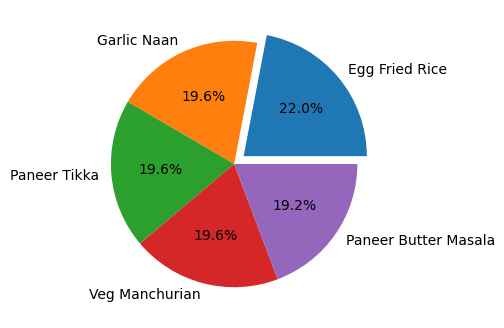

In [35]:
#explodes the top most dish using pie chart
plt.figure(figsize=(6,4)) #width and height
plt.pie(dish,labels=dish.index,explode=[0.1,0,0,0,0],autopct="%.1f%%")
plt.show()

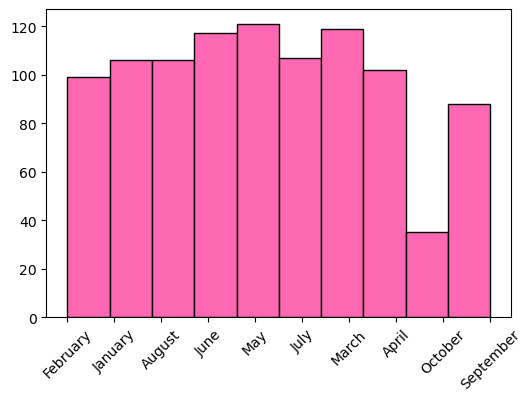

In [36]:
#in which month has highest orders placed using histogram
plt.figure(figsize=(6,4))
plt.hist(x=data["month"],edgecolor="black",rwidth=5,color="hotpink")
plt.xticks(rotation=45)
plt.show()

In [37]:
#to find unique values in order_status
data["Order_Status"].value_counts()

Order_Status
Completed    930
Cancelled     70
Name: count, dtype: int64

In [38]:
#to find the unique values in payment_method
pay=data["Payment_Method"].value_counts()
pay

Payment_Method
Cash           263
UPI            262
Credit Card    246
Net Banking    229
Name: count, dtype: int64

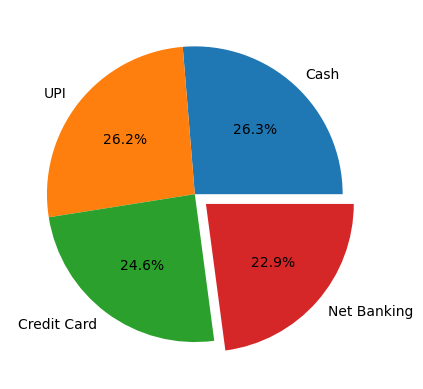

In [39]:
#how many people pay the bill in which method showing using pie chart
plt.pie(x=pay,labels=pay.index,explode=[0,0,0,0.1],autopct="%1.1f%%")
plt.show()

In [40]:
data["Customer_Location"].value_counts()

Customer_Location
Chennai      171
Delhi        158
Pune         150
Kolkata      143
Bangalore    140
Mumbai       130
Hyderabad    108
Name: count, dtype: int64

In [41]:
data["Customer_Age_Group"].value_counts()

Customer_Age_Group
26-35    276
36-45    262
18-25    250
46-55    212
Name: count, dtype: int64

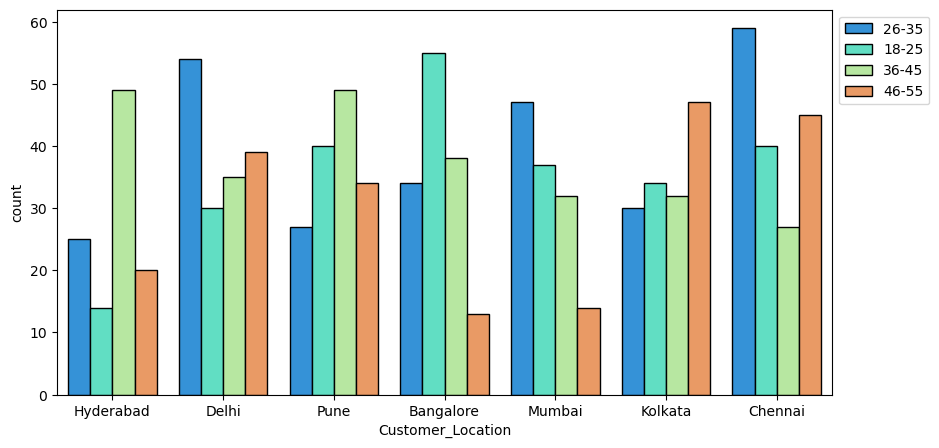

In [42]:
#based on customer location and age group how many orders placed
plt.figure(figsize=(10,5))
sns.countplot(x="Customer_Location",data=data,hue="Customer_Age_Group",palette="rainbow",edgecolor="black")
plt.legend(bbox_to_anchor=(1,1)) #shifts the legened to the top right outside the graph
plt.show()

In [43]:
#unique values in restaurant working hours
data["rest_Operational_Hours"].value_counts()

rest_Operational_Hours
09:00-23:00    194
10:00-23:00    190
10:00-22:30    183
11:00-22:00    135
11:00-22:30    109
22:00-06:00    104
00:00-23:59     85
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

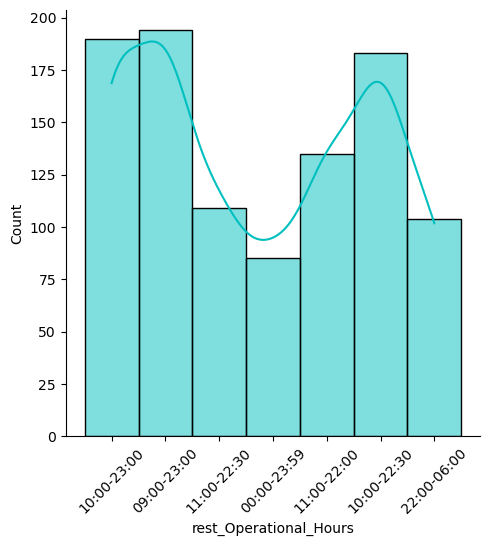

In [44]:
#restaurants opened on which working hours
plt.figure(figsize=(10,6))
sns.displot(x="rest_Operational_Hours",data=data,kde=True,color="c")
plt.xticks(rotation=45)
plt.show()

In [45]:
#bivariant analysis

In [46]:
#find the total sum based on hour
amount=data.groupby("hour")["Total_Amount"].sum()
amount

hour
0     42015.52
2     46372.09
4     48062.28
6     41308.84
8     48380.33
10    52342.62
12    47042.79
14    54943.63
16    41057.70
18    53138.49
20    44165.72
22    62775.56
Name: Total_Amount, dtype: float64

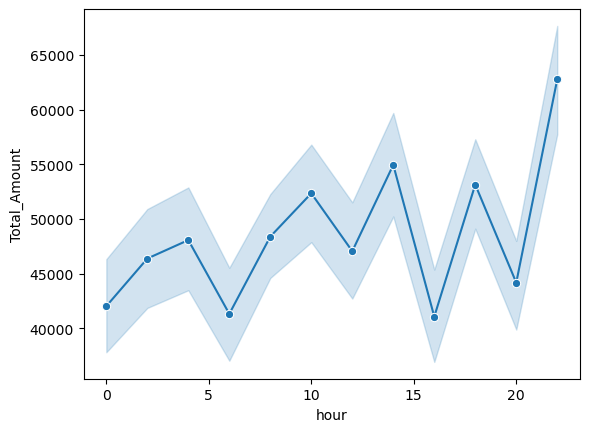

In [47]:
#find the total sum based on hour using lineplot
sns.lineplot(x = "hour", y = "Total_Amount", data = data, estimator = "sum",marker="o")
plt.show()

In [48]:
#location wise order status count 
status=data.groupby(["Customer_Location","Order_Status"]).size().reset_index(name="count")
status

,Customer_Location,Order_Status,count
0,Bangalore,Cancelled,9
1,Bangalore,Completed,131
2,Chennai,Cancelled,11
3,Chennai,Completed,160
4,Delhi,Cancelled,6
5,Delhi,Completed,152
6,Hyderabad,Cancelled,9
7,Hyderabad,Completed,99
8,Kolkata,Cancelled,13
9,Kolkata,Completed,130


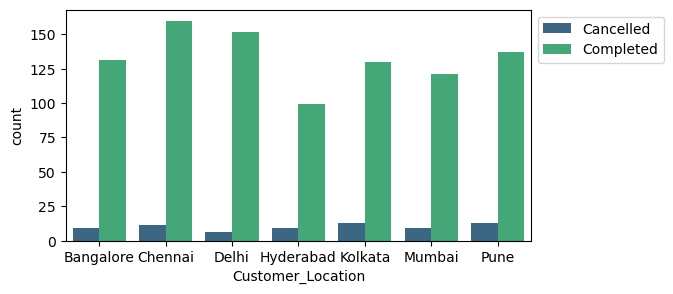

In [49]:
plt.figure(figsize=(6,3))
sns.barplot(x="Customer_Location",y="count",data=status,hue="Order_Status",palette="viridis")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [50]:
data["rest_Cuisine_Types"].value_counts()

rest_Cuisine_Types
American           215
Continental        176
Indian, Chinese    170
Japanese           117
Italian, Indian     93
Thai                82
Fast Food           76
Mexican             71
Name: count, dtype: int64

In [51]:
#sum of ammount based on cuisine
cuisine=data.groupby("rest_Cuisine_Types")["Total_Amount"].sum().reset_index()
cuisine

,rest_Cuisine_Types,Total_Amount
0,American,128335.55
1,Continental,101042.16
2,Fast Food,46046.92
3,"Indian, Chinese",94448.84
4,"Italian, Indian",50980.86
5,Japanese,70341.27
6,Mexican,41602.95
7,Thai,48807.02


C:\Users\PUJITHA\AppData\Local\Temp\ipykernel_15256\1572409011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cuisine,x="Total_Amount",y="rest_Cuisine_Types",palette="coolwarm")


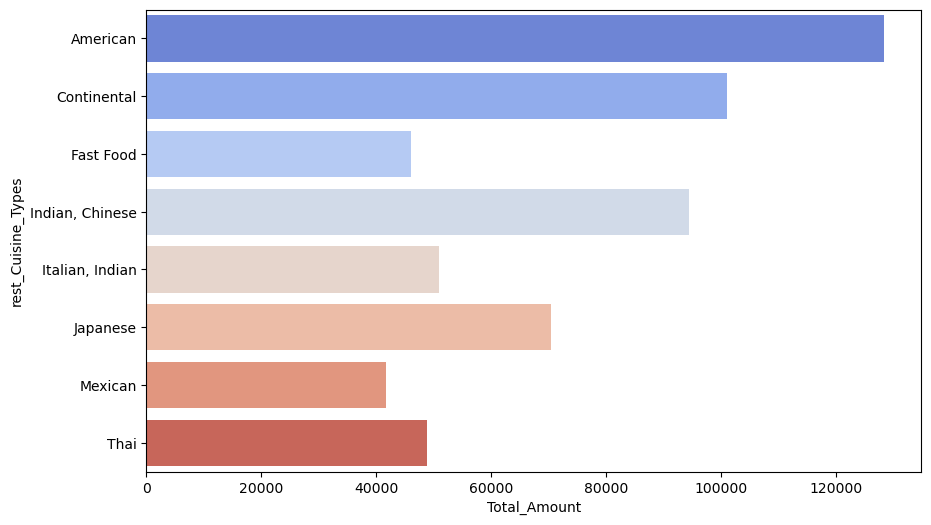

In [52]:
# using horizontal bar plot 
plt.figure(figsize=(10,6))
sns.barplot(data=cuisine,x="Total_Amount",y="rest_Cuisine_Types",palette="coolwarm")
plt.show()            

In [145]:
#avg delivery time based on cuisine type
avg_time_cuisine=data.groupby('rest_Cuisine_Types')[['Expected_Delivery_Time', 'Actual_Delivery_Time']].mean().reset_index()
avg_time_cuisine

,rest_Cuisine_Types,Expected_Delivery_Time,Actual_Delivery_Time
0,American,35.609302,37.269767
1,Continental,35.363636,36.937500
2,Fast Food,35.618421,37.144737
3,"Indian, Chinese",35.235294,37.211765
4,"Italian, Indian",35.193548,37.817204
5,Japanese,34.974359,37.316239
6,Mexican,35.338028,37.366197
7,Thai,34.317073,37.195122


<Axes: >

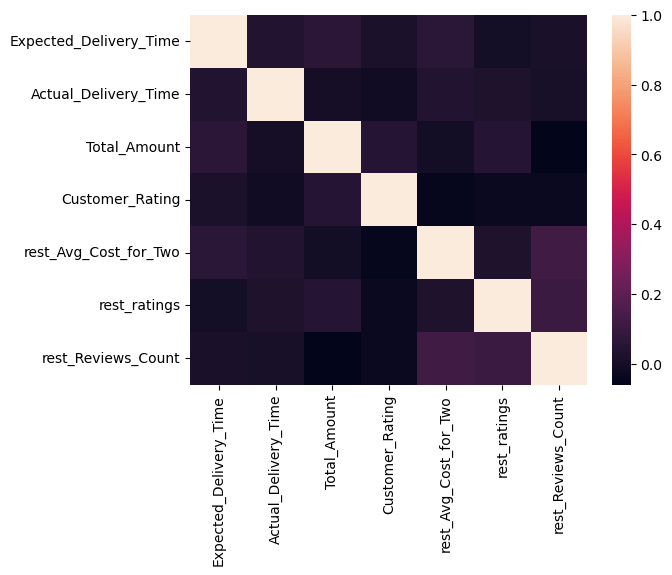

In [54]:
#find the correlation between numeical variables using heatmap
df2=data[["Expected_Delivery_Time","Actual_Delivery_Time","Total_Amount","Customer_Rating","rest_Avg_Cost_for_Two","rest_ratings","rest_Reviews_Count"]]
cor=df2.corr()
sns.heatmap(cor)

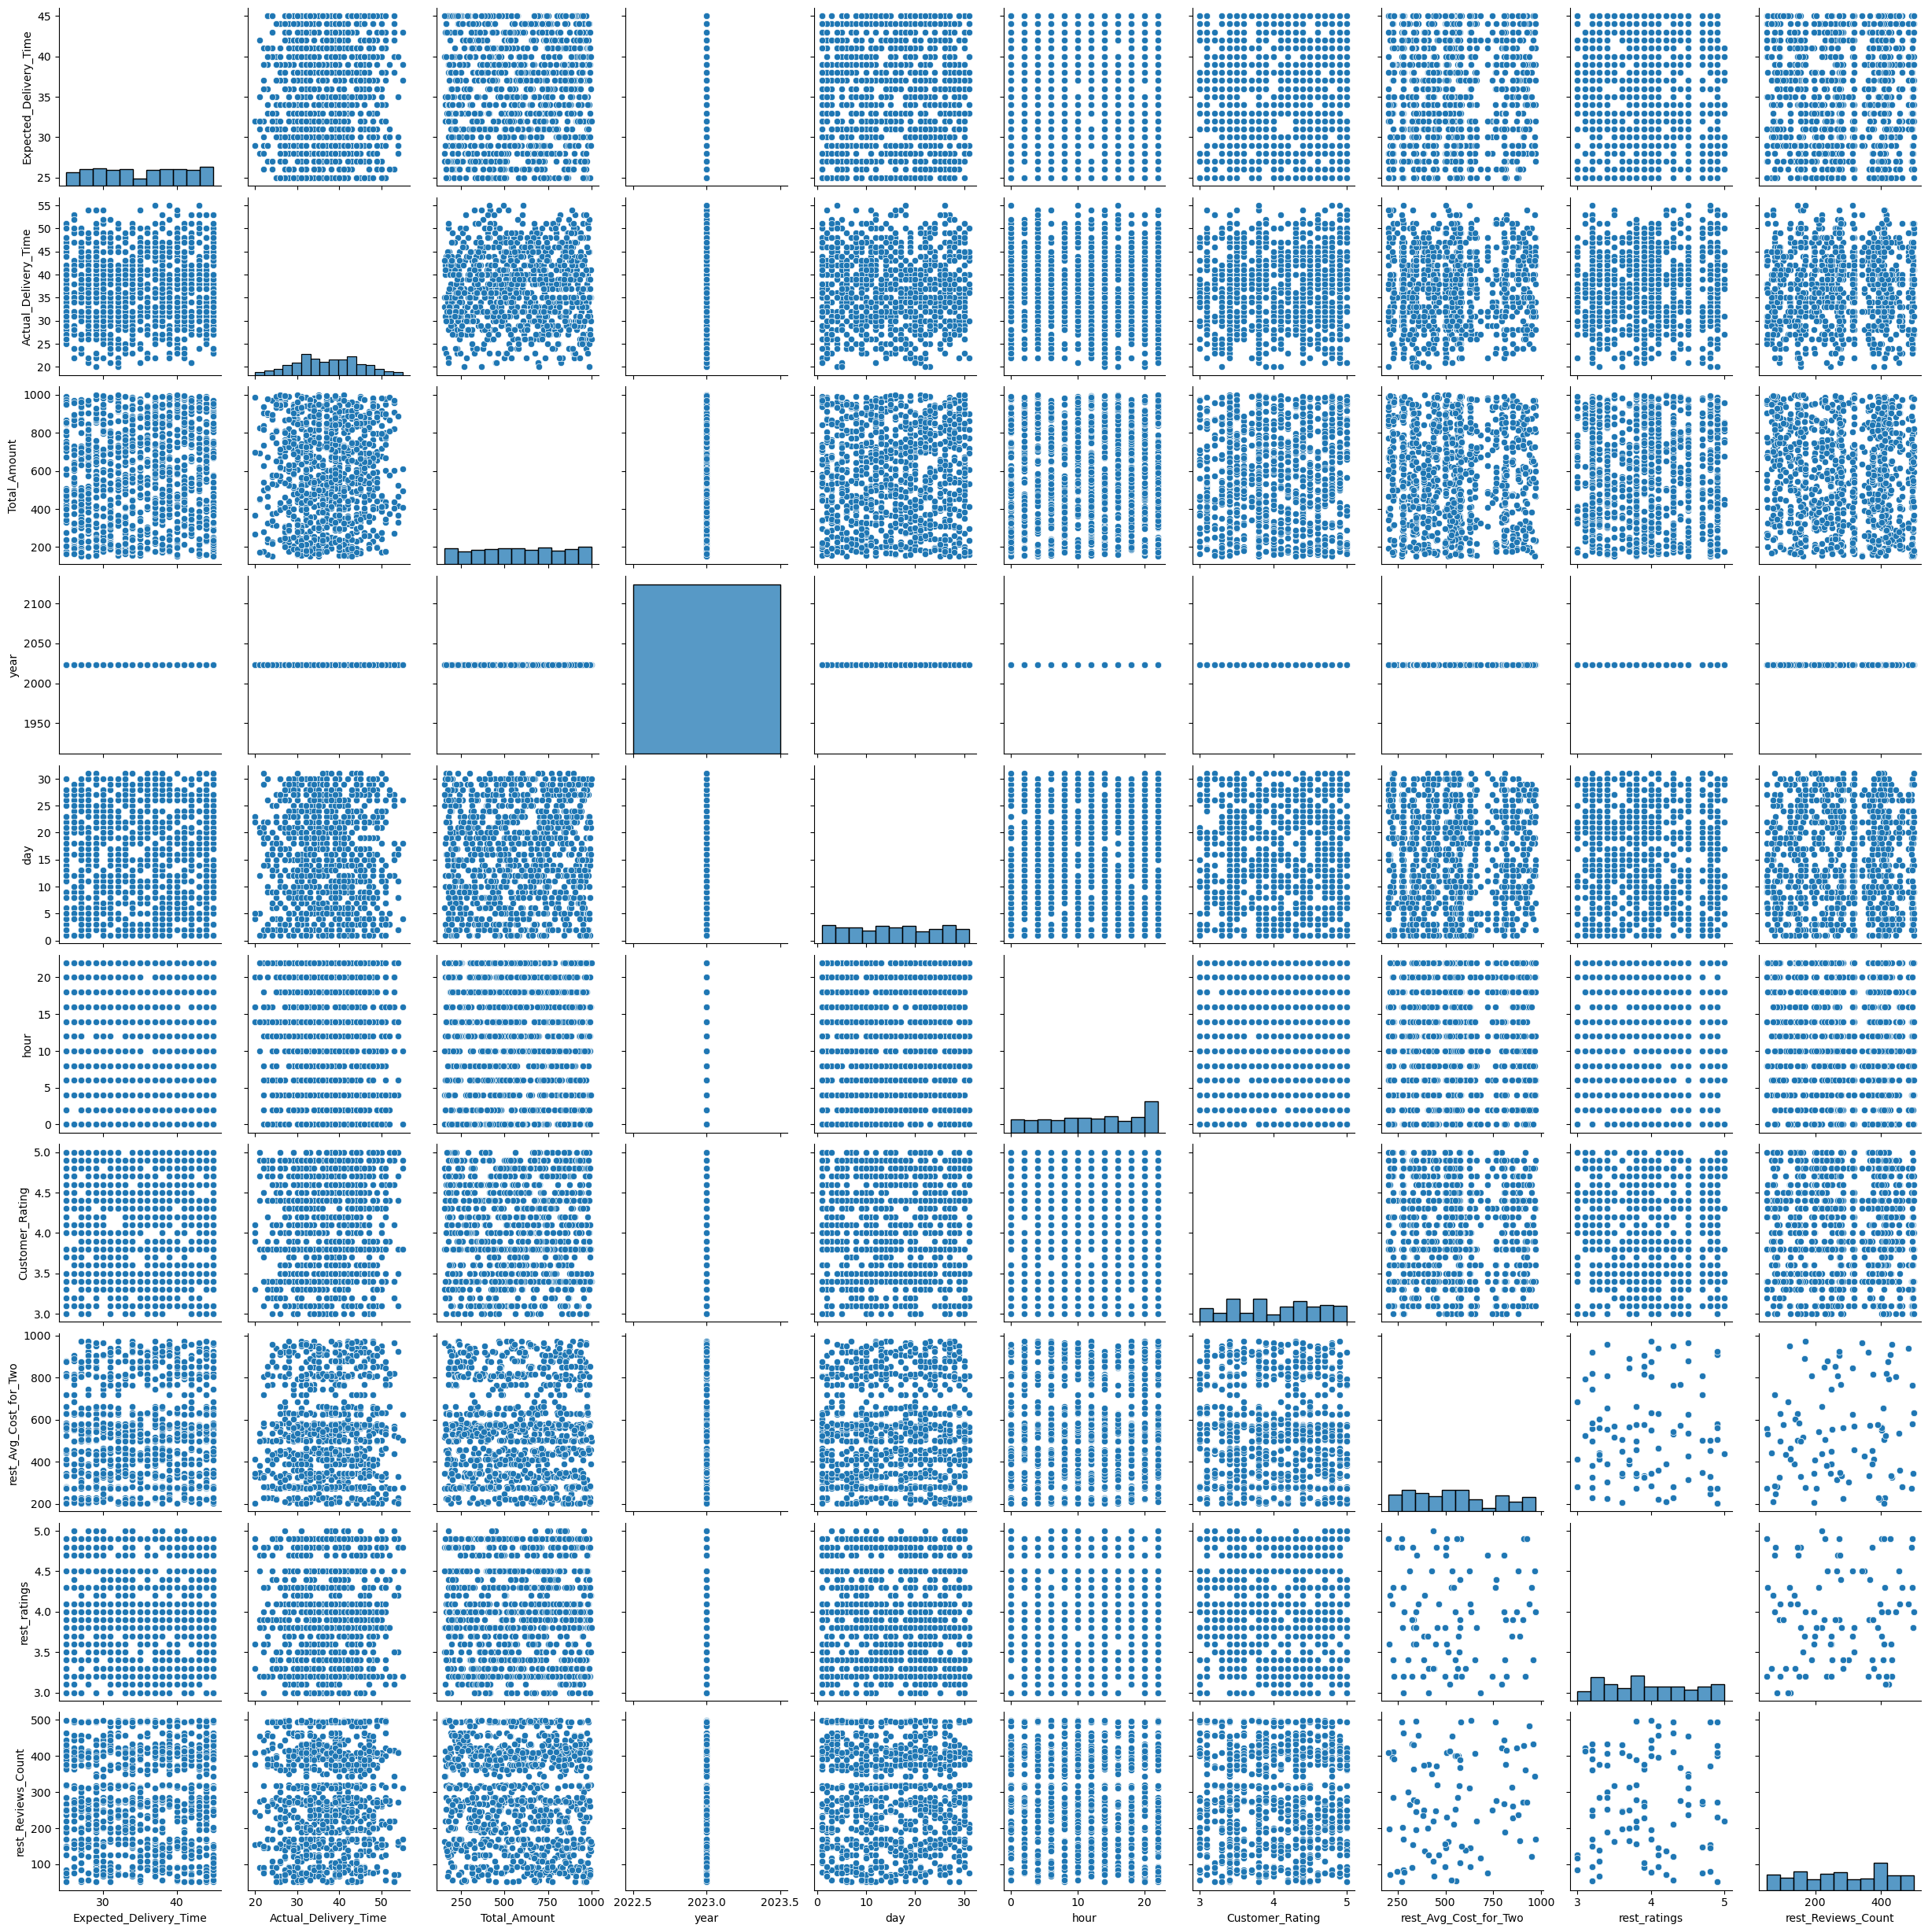

In [137]:
#find the relation between variables using pairplot
sns.pairplot(data)
plt.show()

In [141]:
#insights

In [ ]:
1.Order Trends
-->Top Dish: Egg fried rice is the most frequently ordered dish.
-->Monthly Orders:
       Highest Orders: May recorded the highest number of orders.
       Least Orders: October had the least number of orders.

2.Payment Methods:
-->Cash Payments: The majority of customers paid using cash.
-->Net Banking: The least number of customers opted for net banking as their payment method.

3.Order Distribution by Location:
-->Highest Orders: Chennai had the highest number of orders.
-->Least Orders: Hyderabad received the least number of orders.

4.Age Group:
-->Most Active Age Group: The majority of orders were placed by customers aged 26-35.
-->Least Active Age Group: The least orders were made by customers aged 46-55.

5.Restaurant Operating Hours
-->Operating Hours: Most restaurants operate from 9 AM to 11 PM (23:00).
                                                   
6.Peak Ordering Times
-->Peak Ordering Time: The hour of 10 PM (22:00) experienced the highest number of orders and total sales.
                                                   
7.Payment Status by Location:
-->Completed Payments: The majority of payment statuses were completed in Chennai.
-->Cancelled Payments: Kolkata had the highest number of cancelled payment statuses.

8.Cuisine Type:
-->Highest Total Price: American cuisine recorded the highest total sales price.
-->Lowest Total Price: Fast food items had the lowest total sales price.